In [ ]:
import numpy as np
import pandas as pd 
import re
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
# import nltk
# import spacy                                       ## pip install -U spacy
# from nltk.tokenize.toktok import ToktokTokenizer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
from nltk.cluster import KMeansClusterer
import nltk
from sklearn.manifold import TSNE

In [3]:
from sklearn.cluster import KMeans

In [4]:
import numpy as np
import seaborn as sns

In [5]:
data = pd.read_csv('fbportal_updated.csv')
data.head()

,Test Case Description,Label
0,What's the weather like in Chicago?,Weather
1,What is the forecast in Tampa for tomorrow?,Weather
2,What is the weather in Oregon today?,Weather
3,Is it raining in France right now?,Weather
4,Show me the weather in Mexico for next week.,Weather


In [6]:
data.shape

(321, 2)

In [7]:
def text_cleaner(text):
   
    newString = text.lower()
    newString = re.sub(r"pre-conditions: ","",newString)
    newString = re.sub(r"precondition: ","",newString)
    newString = re.sub(r"[^a-zA-Z0-9]+", ' ', newString)
    #newString = remove_stopwords(newString)
    return newString

In [8]:
#call the function
cleaned_text = []
data['Test Case Description']=data['Test Case Description'].astype(str)
for t in data['Test Case Description']:
    cleaned_text.append(text_cleaner(t))
data['cleaned_text']=cleaned_text

## Sentence Embedding and applying clustering on it by using sentence_transformers

#### Trying with paraphrase-mpnet-base-v2 pre-trained model

In [9]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-mpnet-base-v2')

In [10]:
def embeddings(data):
    sentence_embeddings = model.encode(list(data['cleaned_text']))
    return sentence_embeddings
embeddings_trs=embeddings(data)
data['embediing_trf_mpnetv2']=list(embeddings_trs)

In [11]:
data['embediing_trf_mpnetv2'][0].shape

(768,)

### Clustering by KMeansClusterer

In [12]:
def clustering_data_trf(data,NUM_CLUSTERS = 8):

    sentences = data['cleaned_text']

    X = np.array(data['embediing_trf_mpnetv2'].tolist())

    kclusterer = KMeansClusterer(
        NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,
        repeats=25,avoid_empty_clusters=True)

    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

    data['cluster_trf_mpnetv2'] = pd.Series(assigned_clusters, index=data.index)
    data['centroid_trf_mpnetv2'] = data['cluster_trf_mpnetv2'].apply(lambda x: kclusterer.means()[x])
    return data, assigned_clusters

In [13]:
data, cluster_trf=clustering_data_trf(data)

In [14]:
data.head()

,Test Case Description,Label,cleaned_text,embediing_trf_mpnetv2,cluster_trf_mpnetv2,centroid_trf_mpnetv2
0,What's the weather like in Chicago?,Weather,what s the weather like in chicago,"[-0.2596288, -0.14695789, 0.020649455, -0.047730684, -0.046669986, -0.04129103, 0.09702558, -0.08905009, 0.27967617, 0.16614085, -0.07510154, 0.120876655, 0.079032876, -0.093016595, -0.10804349, -...",6,"[-0.16757931, -0.07147659, -0.016031276, 0.005271352, -0.033088308, -0.040187016, 0.016427312, -0.11789381, 0.08935618, 0.10718063, 0.038088784, 0.019579535, -0.019196272, -0.007722698, -0.0019715..."
1,What is the forecast in Tampa for tomorrow?,Weather,what is the forecast in tampa for tomorrow,"[-0.17203769, -0.11953853, -0.06400142, 0.007883898, 0.06227426, -0.07932908, 0.076673865, -0.1735288, -0.12352282, 0.12597401, 0.004465685, -0.05349075, 0.051237863, 0.19635461, 0.004903705, -0.2...",6,"[-0.16757931, -0.07147659, -0.016031276, 0.005271352, -0.033088308, -0.040187016, 0.016427312, -0.11789381, 0.08935618, 0.10718063, 0.038088784, 0.019579535, -0.019196272, -0.007722698, -0.0019715..."
2,What is the weather in Oregon today?,Weather,what is the weather in oregon today,"[-0.23514578, -0.15196307, 0.013590285, 0.05105356, 0.05673476, -0.13748449, -0.0009205904, -0.11511482, 0.23991424, 0.11651438, 0.07041833, 0.001766522, -0.061576128, -0.13164507, -0.19755906, -0...",6,"[-0.16757931, -0.07147659, -0.016031276, 0.005271352, -0.033088308, -0.040187016, 0.016427312, -0.11789381, 0.08935618, 0.10718063, 0.038088784, 0.019579535, -0.019196272, -0.007722698, -0.0019715..."
3,Is it raining in France right now?,Weather,is it raining in france right now,"[-0.12353737, -0.02291037, 0.050014462, 0.10458012, -0.042253677, -0.12701151, 0.07763976, -0.29935494, -0.07251796, 0.0541276, 0.08598463, -0.07317832, -0.16010588, -0.23718908, 0.16248909, -0.14...",6,"[-0.16757931, -0.07147659, -0.016031276, 0.005271352, -0.033088308, -0.040187016, 0.016427312, -0.11789381, 0.08935618, 0.10718063, 0.038088784, 0.019579535, -0.019196272, -0.007722698, -0.0019715..."
4,Show me the weather in Mexico for next week.,Weather,show me the weather in mexico for next week,"[-0.40619734, 0.2638949, -0.115569025, 0.13067484, 0.040404174, -0.08770294, -0.014724211, -0.030880768, 0.30103007, 0.09034178, -0.09181559, 0.1137036, 0.08853404, 0.10972795, -0.09293235, -0.328...",6,"[-0.16757931, -0.07147659, -0.016031276, 0.005271352, -0.033088308, -0.040187016, 0.016427312, -0.11789381, 0.08935618, 0.10718063, 0.038088784, 0.019579535, -0.019196272, -0.007722698, -0.0019715..."


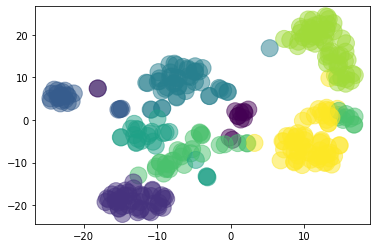

In [15]:
X = np.array(data['embediing_trf_mpnetv2'].tolist())

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)

Y=model.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1], c=cluster_trf, s=290,alpha=.5)
plt.show()

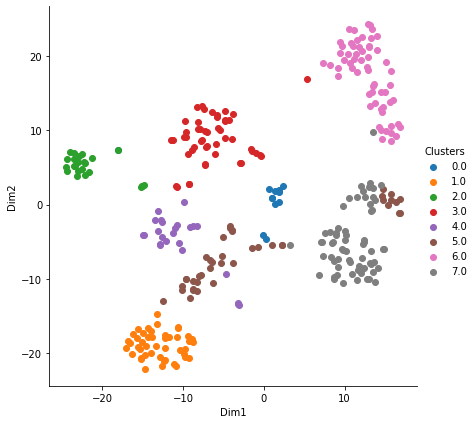

In [16]:
tnse_data=np.vstack((Y.T, cluster_trf)).T
tsne_df=pd.DataFrame(data=tnse_data, columns=('Dim1','Dim2','Clusters'))

sns.FacetGrid(tsne_df, hue="Clusters", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

In [17]:
print(data['Label'].value_counts())
print(data['cluster_trf_mpnetv2'].value_counts())

Device       101
Timer         47
Calling       43
Weather       35
Alarm         28
Time          26
Corona        25
Integrity     16
Name: Label, dtype: int64
7    65
6    60
3    49
1    46
5    41
2    24
4    24
0    12
Name: cluster_trf_mpnetv2, dtype: int64


In [18]:
pd.set_option('display.max_rows', 500)
data[data['cluster_trf_mpnetv2']==4][['cleaned_text','Label','cluster_trf_mpnetv2']]

,cleaned_text,Label,cluster_trf_mpnetv2
250,have an app open close the app,Device,4
257,have an app open exit the app,Device,4
260,go to my apps,Device,4
263,go to superframe,Device,4
264,go to the homescreen,Device,4
276,open facebook live,Device,4
277,open food network,Device,4
278,open frame,Device,4
279,open homescreen,Device,4
280,open iheart,Device,4


In [19]:
help(KMeans())

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` 

### Clustering by using KMean
#### Validating with silhouette analysis

In [20]:
# silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(list(data['embediing_trf_mpnetv2']))
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(list(data['embediing_trf_mpnetv2']), cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.08589451760053635
For n_clusters=3, the silhouette score is 0.11805395036935806
For n_clusters=4, the silhouette score is 0.14014770090579987
For n_clusters=5, the silhouette score is 0.16892878711223602
For n_clusters=6, the silhouette score is 0.18315863609313965
For n_clusters=7, the silhouette score is 0.17741714417934418
For n_clusters=8, the silhouette score is 0.18328960239887238


In [21]:
from sklearn.model_selection import GridSearchCV
parameters={
            'init' : ['k-means++', 'random'],
            'algorithm' : ["auto", "full", "elkan"],
            'max_iter' : [50,100,200,300],
            'n_init' : [10,20,30]
    
            }
clustering_model = KMeans(n_clusters=num_clusters,n_jobs=-1)
grid = GridSearchCV(clustering_model, cv=5, param_grid = parameters, scoring = 
    silhouette_score)

grid.fit(list(data['embediing_trf_mpnetv2']))
print(grid.best_params_)

{'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 50, 'n_init': 10}


In [28]:
# Perform kmean clustering
num_clusters = 8
clustering_model = KMeans(n_clusters=num_clusters,max_iter=50,n_jobs=-1,algorithm='auto',init='k-means++',n_init=10)
clustering_model.fit(list(data['embediing_trf_mpnetv2']))
cluster_assignment = clustering_model.labels_
data['k_means_clstr']=cluster_assignment

In [29]:
data.tail()

,Test Case Description,Label,cleaned_text,embediing_trf_mpnetv2,cluster_trf_mpnetv2,centroid_trf_mpnetv2,k_means_clstr
316,Turn up volume to 9,Device,turn up volume to 9,"[-0.15884307, -0.16543762, -0.08667616, 0.077393316, 0.04831223, -0.0076580294, -0.021989588, -0.03983077, -0.17692931, -0.06666456, -0.033550043, 0.32258636, -0.04298807, 0.3225653, 0.033644754, ...",5,"[-0.10170239, -0.114142284, -0.040480644, 0.044469684, 0.007897732, 0.026025048, 0.11745063, -0.05830881, -0.066542715, 0.0050242105, -0.020441797, 0.115782045, -0.06369364, 0.18186009, -0.0540521...",6
317,turn volume down to 4,Device,turn volume down to 4,"[-0.13405629, -0.19201489, -0.11355366, 0.080282465, 0.00036663882, -0.022061238, 0.065397814, 0.00732788, -0.25443858, -0.09347296, -0.16943075, 0.13501033, -0.009170669, 0.27248278, -0.091803156...",5,"[-0.10170239, -0.114142284, -0.040480644, 0.044469684, 0.007897732, 0.026025048, 0.11745063, -0.05830881, -0.066542715, 0.0050242105, -0.020441797, 0.115782045, -0.06369364, 0.18186009, -0.0540521...",6
318,unmute,Device,unmute,"[-0.19125822, 0.16071796, -0.011829899, 0.023015667, 0.08483713, 0.1352225, 0.09229406, 0.053015757, -0.039173495, -0.11389708, -0.094270214, 0.234221, -0.06612792, 0.12475861, -0.2218874, -0.1409...",5,"[-0.10170239, -0.114142284, -0.040480644, 0.044469684, 0.007897732, 0.026025048, 0.11745063, -0.05830881, -0.066542715, 0.0050242105, -0.020441797, 0.115782045, -0.06369364, 0.18186009, -0.0540521...",4
319,what is the brightness,Device,what is the brightness,"[0.0038822268, -0.3810852, -0.1379131, 0.019620415, -0.10225227, -0.03722035, 0.017079914, -0.08185152, -0.20147514, 0.10503155, 0.12892723, -0.043122236, -0.04185528, -0.039918397, 0.07134822, -0...",1,"[-0.16253904, -0.2537476, -0.07791836, 0.04187526, -0.017072536, -0.03729758, 0.10514549, 0.07246274, -0.11048424, 0.053315293, 0.017385922, 0.059522428, -0.0002131317, 0.2588267, -0.012610078, -0...",3
320,what is the volume right now,Device,what is the volume right now,"[-0.053872313, -0.3612306, -0.034060165, -0.0028244609, -0.045409106, 0.07237117, 0.06133456, -0.14484213, -0.24394095, 0.12657464, -0.12049865, 0.103519246, -0.023240842, 0.1880966, -0.09028086, ...",5,"[-0.10170239, -0.114142284, -0.040480644, 0.044469684, 0.007897732, 0.026025048, 0.11745063, -0.05830881, -0.066542715, 0.0050242105, -0.020441797, 0.115782045, -0.06369364, 0.18186009, -0.0540521...",6


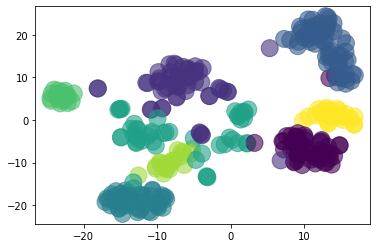

In [30]:
X = np.array(data['embediing_trf_mpnetv2'].tolist())

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)

Y=model.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1], c=cluster_assignment, s=290,alpha=.6)
plt.show()

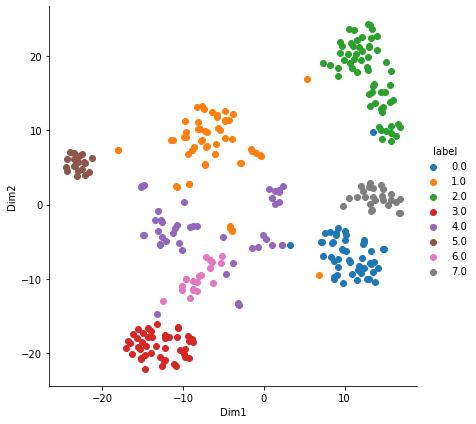

In [31]:
tnse_data=np.vstack((Y.T, cluster_assignment)).T
tsne_df=pd.DataFrame(data=tnse_data, columns=('Dim1','Dim2','label'))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

In [32]:
print(data['Label'].value_counts())
print(data['k_means_clstr'].value_counts())

Device       101
Timer         47
Calling       43
Weather       35
Alarm         28
Time          26
Corona        25
Integrity     16
Name: Label, dtype: int64
2    60
1    56
0    49
4    47
3    45
7    25
6    20
5    19
Name: k_means_clstr, dtype: int64


In [27]:
pd.set_option('display.max_rows', 500)
data[data['k_means_clstr']==5][['cleaned_text','Label','k_means_clstr']]

,cleaned_text,Label,k_means_clstr
35,is the alarm currently set,Alarm,5
36,create alarm for 3pm,Alarm,5
37,update the alarm,Alarm,5
38,set alarm,Alarm,5
40,alarm off,Alarm,5
41,do i have an alarm set for 6 am monday,Alarm,5
42,give me an alarm for tomorrow,Alarm,5
43,have my alarm go off in an hour,Alarm,5
45,how long until my alarm goes off,Alarm,5
46,how many minutes are left on my current alarm,Alarm,5
